In [1]:
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import association_rules, apriori

warnings.filterwarnings('ignore')

In [2]:
store_data = pd.read_csv('../b. Datasets/Super Store Dataset.csv')

In [3]:
store_data.shape

(7500, 20)

In [4]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

In [5]:
display(store_data.head(2))
display(store_data.tail(2))

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
store_data.isna().sum()

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

In [7]:
store_data.fillna(0, inplace=True)

In [8]:
display(store_data.head(2))
display(store_data.tail(2))

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
7498,escalope,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
7499,eggs,frozen smoothie,yogurt cake,low fat yogurt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [9]:
store_data = store_data.applymap(lambda x: True if x != 0 else False)

In [10]:
display(store_data.head(2))
display(store_data.tail(2))

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
7498,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7499,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
frequent_itemsets = apriori(store_data, 
                            min_support=0.1, 
                            use_colnames=True)

In [12]:
rules = association_rules(frequent_itemsets, 
                          metric='lift', 
                          min_threshold=1.0)

In [13]:
rules_sorted = rules.sort_values(by='lift', 
                                 ascending=False)

In [14]:
display(rules_sorted.head(2))
display(rules_sorted.tail(2))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5156,"(yams, almonds)","(shrimp, avocado, cottage cheese, green grapes...",0.1824,0.130667,0.130667,0.716374,5.482456,0.106833,3.065072,1.0
4766,"(vegetables mix, whole weat flour, yams)","(green grapes, cottage cheese, avocado)",0.1824,0.130667,0.130667,0.716374,5.482456,0.106833,3.065072,1.0


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
392,"(vegetables mix, avocado, almonds)",(shrimp),0.445867,1.0,0.445867,1.0,1.0,0.0,inf,0.0
0,(almonds),(shrimp),0.766133,1.0,0.766133,1.0,1.0,0.0,inf,0.0


In [15]:
rules_sorted.shape

(6050, 10)

In [16]:
rules_sorted[rules_sorted['lift'] > 2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5156,"(yams, almonds)","(shrimp, avocado, cottage cheese, green grapes...",0.182400,0.130667,0.130667,0.716374,5.482456,0.106833,3.065072,1.000000
4766,"(vegetables mix, whole weat flour, yams)","(green grapes, cottage cheese, avocado)",0.182400,0.130667,0.130667,0.716374,5.482456,0.106833,3.065072,1.000000
5455,"(vegetables mix, yams, green grapes, shrimp)","(whole weat flour, cottage cheese, almonds)",0.182400,0.130667,0.130667,0.716374,5.482456,0.106833,3.065072,1.000000
2949,"(yams, avocado)","(green grapes, cottage cheese, vegetables mix)",0.182400,0.130667,0.130667,0.716374,5.482456,0.106833,3.065072,1.000000
5453,"(vegetables mix, yams, whole weat flour, shrimp)","(green grapes, cottage cheese, almonds)",0.182400,0.130667,0.130667,0.716374,5.482456,0.106833,3.065072,1.000000
...,...,...,...,...,...,...,...,...,...,...
3070,"(green grapes, whole weat flour, shrimp, avocado)","(vegetables mix, almonds)",0.248400,0.445867,0.248400,1.000000,2.242823,0.137647,inf,0.737272
3057,"(shrimp, avocado, almonds, whole weat flour, g...",(vegetables mix),0.248400,0.445867,0.248400,1.000000,2.242823,0.137647,inf,0.737272
3677,"(shrimp, almonds, whole weat flour, yams, gree...",(vegetables mix),0.182400,0.445867,0.182400,1.000000,2.242823,0.101074,inf,0.677756
144,(cottage cheese),"(vegetables mix, shrimp)",0.130667,0.445867,0.130667,1.000000,2.242823,0.072407,inf,0.637423


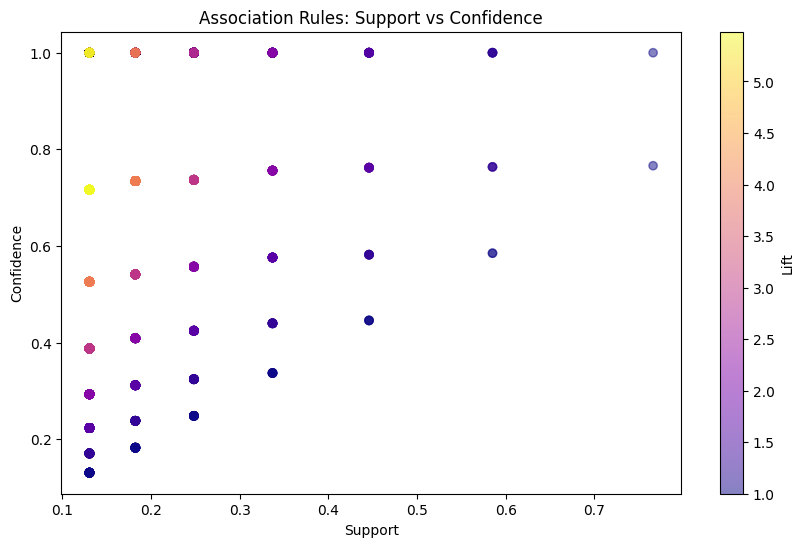

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(x=rules['support'], 
            y=rules['confidence'], 
            alpha=0.5, 
            c=rules['lift'], 
            cmap='plasma')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence')
plt.colorbar(label='Lift')
plt.show()